In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style> *{margin:0; padding:0;} html, body, .container{margin:0;!important padding:0;!important} .container { width:100% !important;}</style>"))

In [2]:
data = np.load('data32_real.npz') #load the data

In [3]:
print(data['arr_0'])
print('----------------------------------')
print(data['arr_1'])

[-5888  4608   256 ...,     0 -3840     0]
----------------------------------
[[ 1280  -256  2048 ...,   768 -2304  1536]
 [ 4608  1280 -3072 ...,     0   512 -2304]
 [ -256  -512   768 ...,  2304  1280 -1536]
 ..., 
 [-1280   512   256 ..., -2560  3328 -3840]
 [-2560  2304  -256 ...,  1280 -3584 -1280]
 [-5120   512  -256 ...,   256  -256  2304]]


NOTE: So the lab says that you have to take 32 samples and I only got 31, so I'll get the rest of the data later. For now I'm going to do my data analysis

First printed array produces array needed for our histogram. Second printed array 
we'll manipulate for our 32 samples. Let's start with our histogram

In [4]:
d0 = data['arr_0']
d0mean = np.mean(d0)
print('My mean of d0 is ' + str(d0mean))
d0mean = np.mean(np.array([d0[i]**2 for i in np.arange(len(d0))]))
print('My squared mean of d0 is ' + str(np.mean(np.array([d0[i]**2 for i in np.arange(len(d0))]))))
d0rms = np.sqrt(d0mean)
print('My RMS of d0 is ' + str(d0rms))

My mean of d0 is 305.152
My squared mean of d0 is 6736576.512
My RMS of d0 is 2595.49157425


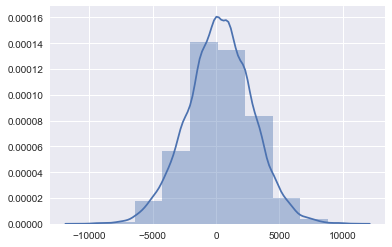

In [5]:
sns.distplot(d0, bins = 10)
plt.show()

The line drawn over the histogram is called a kernel density estimate (KDE). It's used to create an estimate
of the probability density function based on data points received. Kernel densities are different throughout
various software, with different types of kernels and bandwidth inputted into each one. I used Seaborn's default kernel and bandwidth (which is Scipy's default kernel and bandwidth) which is guassian and Scott's rule of thumb, respectively

Let's see how this compares to an actual gaussian distribution. For this, I decided to normalize my data
by finding the z-score and creating a KDE plot over the normalized data. Then, I overlayed a guassian 
function to compare the two.

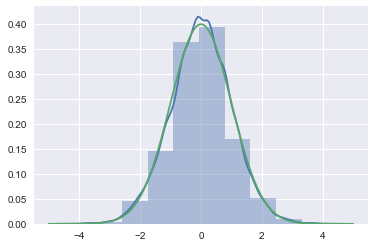

In [6]:
#normalized function
d0norm = stats.zscore(d0)
sns.distplot(d0norm, bins = 10)

#guassian
# Plot between -5 and 5 with .001 steps.
x_axis = np.arange(-5, 5, 0.001)
plt.plot(x_axis, stats.norm.pdf(x_axis,0,1))

plt.show()


Comparing the two distributions we see that they are very similar, one could say identical past the first standard deviation from the mean (where the graphs change concavity). The mean of the graph seems to be the only part of the distribution where there is very noticable deviation, but again, the distributions are very
similar.

In [7]:
table32 = pd.DataFrame(data['arr_1'].T)
table32

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1280,4608,-256,-2048,-768,-1536,-2048,3072,2048,3584,...,1792,-4608,4096,2560,-2304,-2816,-5120,-1280,-2560,-5120
1,-256,1280,-512,0,-2304,768,-1536,-768,1024,2304,...,5632,3584,-2560,-512,1792,2304,3328,512,2304,512
2,2048,-3072,768,2304,512,2048,4608,1792,-3584,-4352,...,-1280,6144,-3328,768,1792,2304,2560,256,-256,-256
3,-1280,-256,-2048,-1024,1024,-256,-4096,-2560,3072,1792,...,-4864,-8704,-256,-1024,-3072,-2048,-1536,-1792,-2048,2816
4,-256,3328,256,256,2816,-256,5888,0,-256,2304,...,2560,5888,5376,512,4352,1280,2560,2816,2816,768
5,1024,1280,2048,-1024,-2560,768,0,5120,768,-768,...,1024,2816,1536,1536,-1536,-1280,-5120,1792,512,-2816
6,3584,-2816,768,768,-256,-1280,-6912,-2560,3584,-512,...,768,-4864,-2560,-1792,-3328,0,3584,-2304,-1024,768
7,-3328,2304,3840,2816,1536,2816,6144,-1280,-5120,-512,...,0,2304,-768,1024,5376,3840,1536,512,0,256
8,-1792,-256,-5632,-2048,1280,3072,2048,1792,768,1536,...,-1536,-1792,-1536,1024,-1024,-1792,-1536,1792,256,3840
9,4352,-1792,-1792,-512,2816,-4608,-1792,2560,2816,2304,...,3584,2560,2560,2560,-768,1280,3584,256,1536,-512


Resources:
https://en.wikipedia.org/wiki/Kernel_(statistics)#Kernel_functions_in_common_use
https://en.wikipedia.org/wiki/Kernel_density_estimation
https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html